In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import *
import random
from cycler import cycler
from sklearn.decomposition import PCA
import matplotlib.collections as collections

In [26]:
filenumber = 10
dfgroup = pd.DataFrame()
sepoint = [0]
"get start point and endpoint (sepoint) of each imported dataframe"

for i in range(0, filenumber):
    "read csv from jointangle folder"
    
    tmp = pd.read_csv('dataimport/jointangle/ja'+str(i+1)+'.csv')
    "record length"
    lth = len(tmp)
#     print(tmp.isnull().values.any())
    dfgroup = dfgroup.append(tmp, ignore_index=True)
    sepoint.append(lth)
    
"initialize PCA preparation dataset"
"Unnamed: 0 not necessary, bug of the previous program calculate_angles_whole.py"
DF = dfgroup.drop('Unnamed: 0', axis =1)
plt.style.use(['science','no-latex'])
dfk = DF.drop('class', axis = 1)
"dfk: the dataframe without class label"

In [27]:
dfk.head()
# add fascia cons.

,ankle,knee,hip,shoulder,neck,elbow
0,1.527825,0.053497,0.003903,-2.859330,-0.674278,0.351953
1,1.527685,0.054004,0.003100,-2.866414,-0.673968,0.353397
2,1.527759,0.054215,0.002254,-2.875060,-0.673353,0.359815
3,1.527837,0.053926,0.001405,-2.879860,-0.671685,0.359362
4,1.527707,0.053912,0.000365,-2.887289,-0.669684,0.363348


In [14]:
mean = dfk.iloc[:,:].apply(lambda x:x.mean(), axis = 0)
"mean: the mean of every joint"
std = dfk.iloc[:,:].apply(lambda x:x.std(), axis = 0)
"std: the standard error of every joint"
diff = dfk.iloc[:,:].apply(lambda x:x-x.mean(), axis = 0)
dfs = dfk.iloc[:, :].apply(lambda x: (x-x.mean()), axis=0)
"dfs: the data of substracting the mean of every joint"
pca = PCA().fit(dfs)
feature = pca.transform(dfs)
"virsualization with Scienceplotlib"
evf=pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))])
# print(ev.to_latex())
"output scores to csv"
"jadf: same to evf"
jadf = pd.DataFrame(feature, columns=['ankle','knee','hip','shoulder','neck', 'elbow'])
jadf.to_csv('dataimport/jointangle/scores.csv')
"get the first components of angle rotations"
print("load: ", pca.explained_variance_ratio_)
print("cum load:", pca.explained_variance_ratio_.cumsum())

load:  [0.74385706 0.17089657 0.05013049 0.01607307 0.01171246 0.00733035]
cum load: [0.74385706 0.91475363 0.96488413 0.9809572  0.99266965 1.        ]


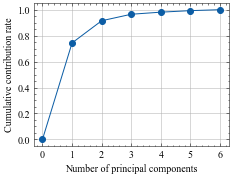

In [15]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.savefig('dataimport/jointangle/ccr.eps', dpi=150)
plt.show()


In [16]:
ppc = np.vstack((pca.components_[0:2],np.zeros(6),np.zeros(6),np.zeros(6),np.zeros(6)))
"ppc: synergy matrix: await for reconstuction"
rec= np.dot(feature,ppc)
reconstruct = pd.DataFrame(rec)
"reconstruct: reconstruted angle dataframe(without mean)"
reconstruct.to_csv('dataimport/jointangle/reconstruct.csv')

In [17]:
namelist = list(mean.index.values) 
"namelist: list of joint names"

"function cyclecolor: odd index: black; even index：white"
def cyclecolor(idx):
    if idx%2 == 0:
        return 'black'
    elif idx%2 == 1:
        return 'grey'

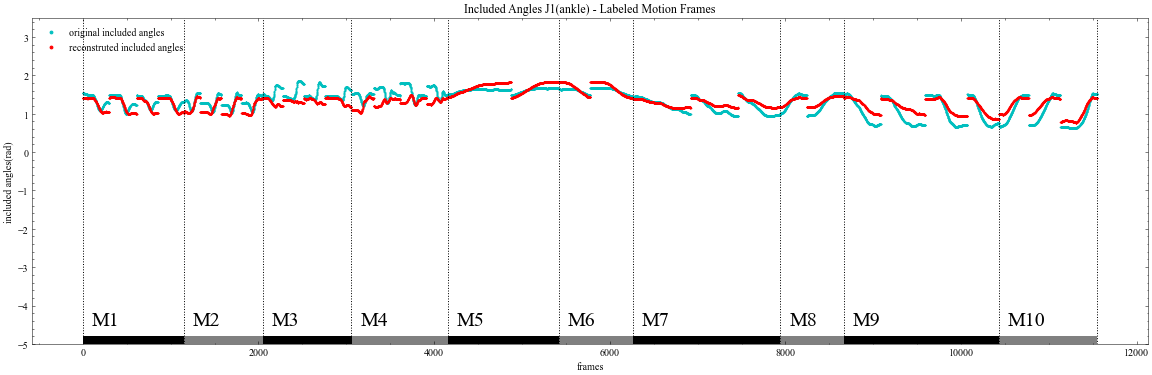

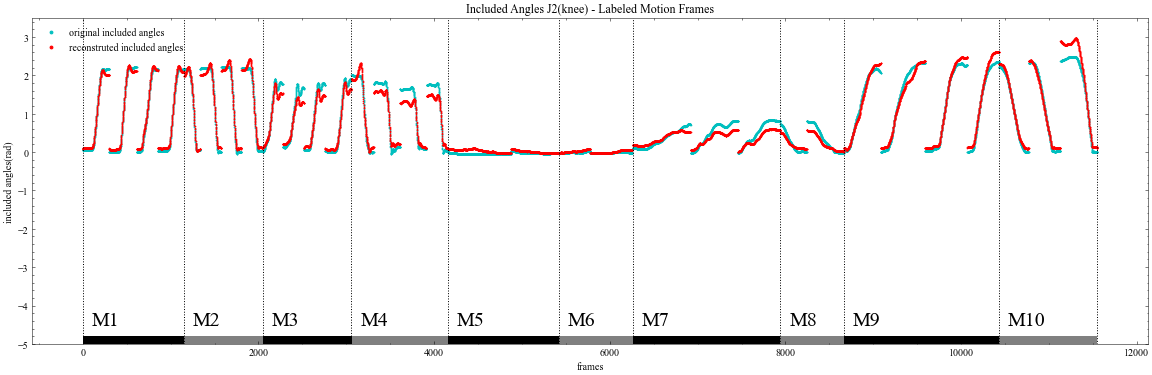

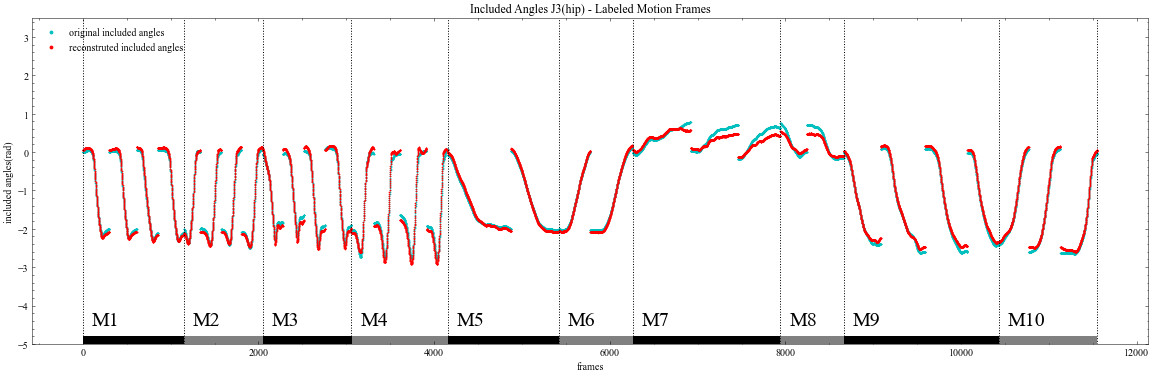

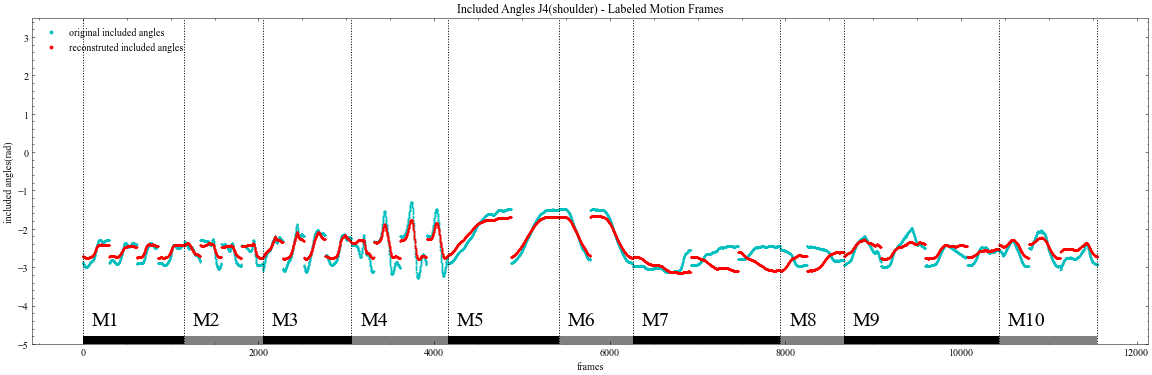

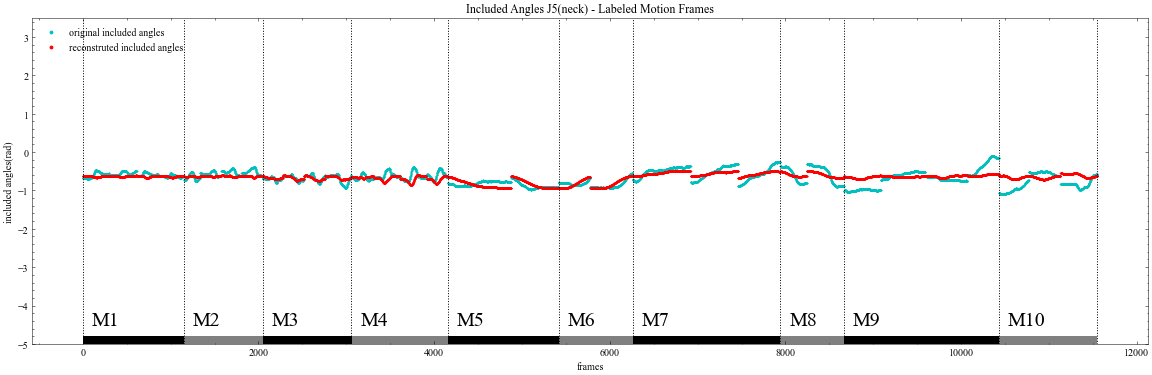

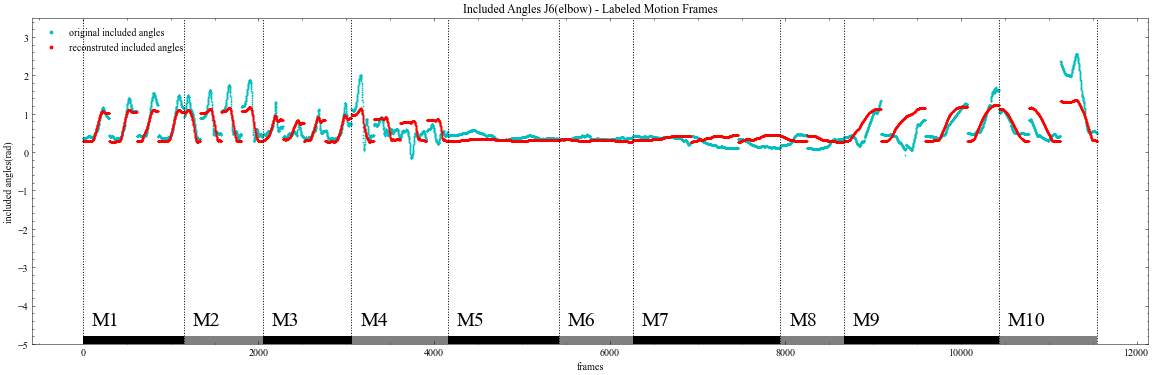

In [18]:
"plot original and reconstructed angle dataframe"
"take approx. 30 secs"
f = np.arange(0,11551)

for i in range(0,6):
    sumsepoint = 0
    fig, ax = plt.subplots(figsize=(20,6)) 
    legendflag = []
    ax.scatter(f, dfs.iloc[:,i]+mean[i],s=0.5,c='c')
    ax.scatter(f, reconstruct.iloc[:,i]+mean[i],s=0.5,c='r')
#     plt.grid(True)
    
    plt.xlabel('frames')
    plt.ylabel('included angles(rad)')
    plt.title('Included Angles J'+ str(i+1)+'('+namelist[i]+')'' - Labeled Motion Frames' )
    plt.legend(['original included angles','reconstruted included angles'],loc='upper left',markerscale = 4,)
    plt.ylim(-5,3.5)
    
    
    for idx in range(0, len(sepoint)):
        sumsepoint = sumsepoint + sepoint[idx]
        if idx !=len(sepoint)-1:
            ax.text(sumsepoint+100, -4.5, r'M'+str(idx+1), fontsize=20)
        collection = collections.BrokenBarHCollection.span_where(
            f, ymin=-5, ymax=-4.8, where=f>sumsepoint, facecolor=cyclecolor(idx))
        ax.add_collection(collection) 
        plt.axvline(sumsepoint, ls=':', color='black')

    
    "save figure"
#     plt.savefig('figures/2020/J'+str(i+1)+'recerror.eps', dpi=150)
    plt.savefig('figures/2020/J'+str(i+1)+'recerror.png', dpi=150)

In [21]:
rec_df = reconstruct+list(mean)
"episodes: M1 to M8 motion sepoints list"
episodes = [[[0,300], [301, 613], [614,854],[855,1155]],[[1156,1336],[1337, 1577],[1578, 1806],[1807, 2047]],
            [[2048, 2276], [2277, 2517], [2518, 2758], [2759, 3058]], [[3059, 3311],[3312, 3612],[3613, 3913],[3914,4154]],
            [[4155, 4875], [4876, 5416]],[[5417, 5777],[5778, 6258]],
            [[6259, 6919], [6920, 7460], [7461, 7941]],[[7942, 8241],[8242, 8663]],[[8664,9084],[9085,9590],[9591,10070],[10071,10431]],[[10432,10768],[10769,11129],[11130,11550]]]

In [24]:
for i in range(filenumber):
    start_point, end_point = [episodes[i][0][0], episodes[i][-1][-1]]
    'cut pd data frame from start point to end point'
    cutdf = pd.DataFrame(rec_df.iloc[start_point: end_point])
    cutdf = cutdf.rename(columns = {0:'ankle',1:'knee',2:'hip',3: 'shoulder',4:'neck',5:'elbow'})
    
    "also, cut evf data from start point to end point"
    cutevf = pd.DataFrame(evf.iloc[start_point: end_point])
    
    cutdf.to_csv('dataimport/jointanglesyn/syn'+str(i+1)+'.csv', index=False)
    cutevf.to_csv('dataimport/projections/projM'+str(i+1)+'.csv', index=False)
    'save j data'
    

In [25]:
np.save('w_synergy', ppc)
np.save('mean', mean)